In [ ]:
# web scraping trustpilot.com for the reviews

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

# Define the URL you want to scrape
url = "https://www.trustpilot.com/review/www.macdonalds.com"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find and extract all review containers
    review_containers = soup.find_all("div", class_="styles_reviewContent__0Q2Tg")

    # Create or open a CSV file for writing
    with open("macdonalds.csv", "w", newline="", encoding="utf-8") as csvfile:
        csv_writer = csv.writer(csvfile)

        # Write the header row
        csv_writer.writerow(["Reviewer Name", "Review Title", "Review Comment"])

        for review in review_containers:
            # Extract the review title
            review_title = review.find("h2", class_="typography_heading-s__f7029").text.strip()

            # Extract the review comment
            review_comment = review.find("p", class_="typography_body-l__KUYFJ").text.strip()

            # Extract the reviewer's name
            reviewer_name = review.find("a", class_="link_internal__7XN06").text.strip()

            # Write the extracted data to the CSV file
            csv_writer.writerow([reviewer_name, review_title, review_comment])

    print("Reviews have been saved to macdonalds.csv")

else:
    print("Failed to retrieve the page. Status code:", response.status_code)




Reviews have been saved to macdonalds.csv


In [ ]:
# Analysis

In [ ]:
import pandas as pd

df = pd.read_csv('macdonalds.csv')
print(df.head())


                        Reviewer Name                        Review Title  \
0             McD Wolverton are awful             McD Wolverton are awful   
1                   Boycott criminals                   Boycott criminals   
2  Free food to kill children in Gaza  Free food to kill children in Gaza   
3            Third time unlucky McD's            Third time unlucky McD's   
4                           WELSHPOOL                           WELSHPOOL   

                                      Review Comment  
0  McD Wolverton are awful. Ordered through Deliv...  
1  This company’s hands are covered with the bloo...  
2  Each time you buy something from them, you bec...  
3  Ordered for the third time from them.For the t...  
4  WELSHPOOL - BUTTINGTON CROSS restaurant.Food o...  


In [ ]:
# 1. WordClouds

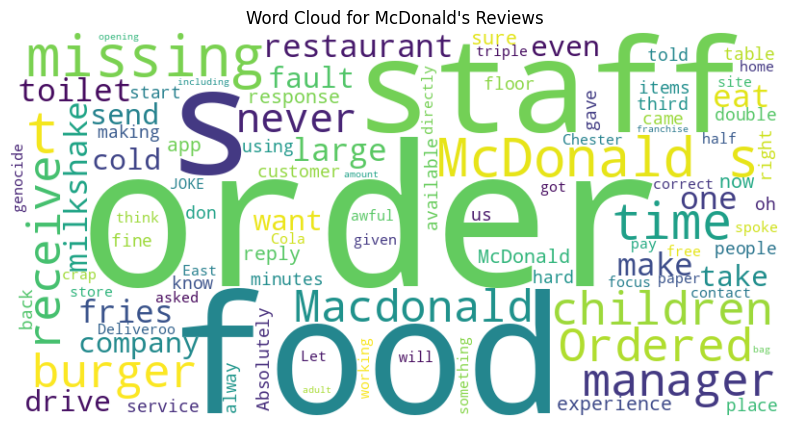

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract the review comments from the DataFrame
review_comments = df['Review Comment'].str.cat(sep=' ')

# Create a WordCloud object with custom settings
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(review_comments)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud for McDonald's Reviews")
plt.show()


In [ ]:


# Sentimental Analysis

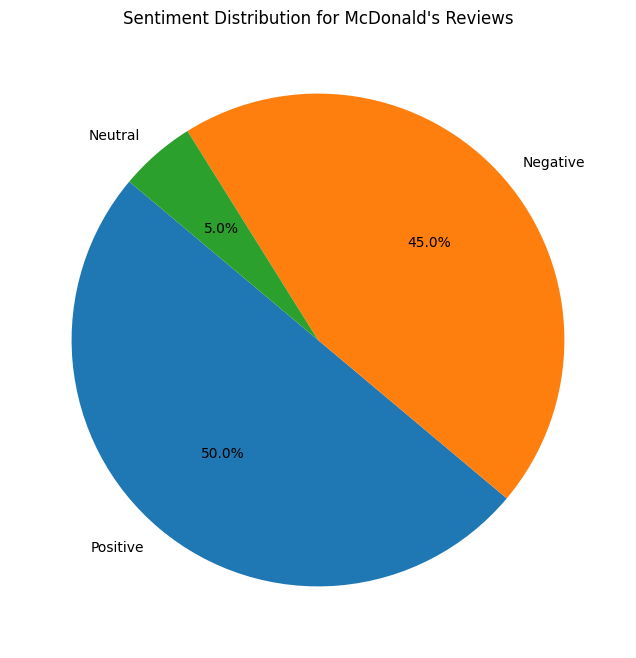

In [ ]:
from textblob import TextBlob
import matplotlib.pyplot as plt


# Perform sentiment analysis and add a new 'Sentiment' column
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Review Comment'].apply(get_sentiment)

# Count the number of reviews in each sentiment category
sentiment_counts = df['Sentiment'].value_counts()

# Create a pie chart to visualize the sentiment distribution
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for McDonald\'s Reviews')
plt.show()


In [ ]:
# Review Length Distribution

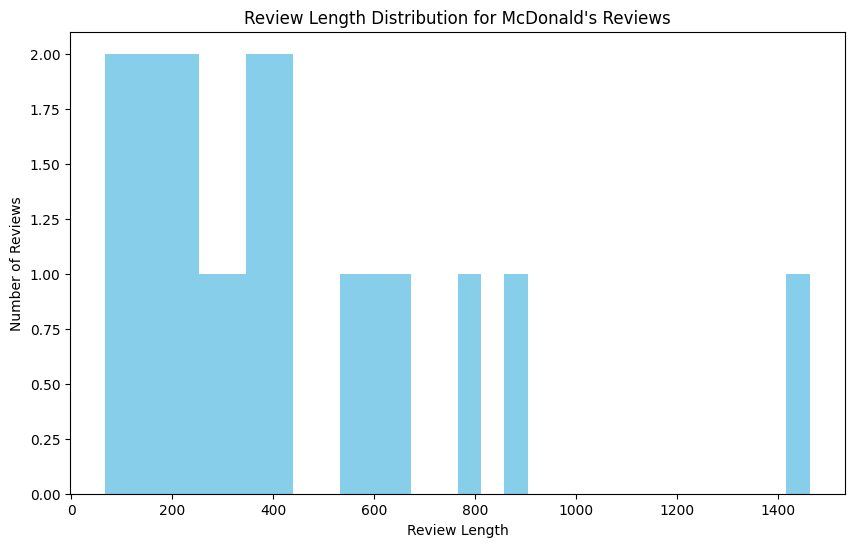

In [ ]:
import matplotlib.pyplot as plt


# Calculate the length of each review and store it in a new column
df['Review Length'] = df['Review Comment'].apply(len)

# Create a histogram to visualize the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(df['Review Length'], bins=30, color='skyblue')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Review Length Distribution for McDonald\'s Reviews')
plt.show()


In [ ]:
# Top Review Titles

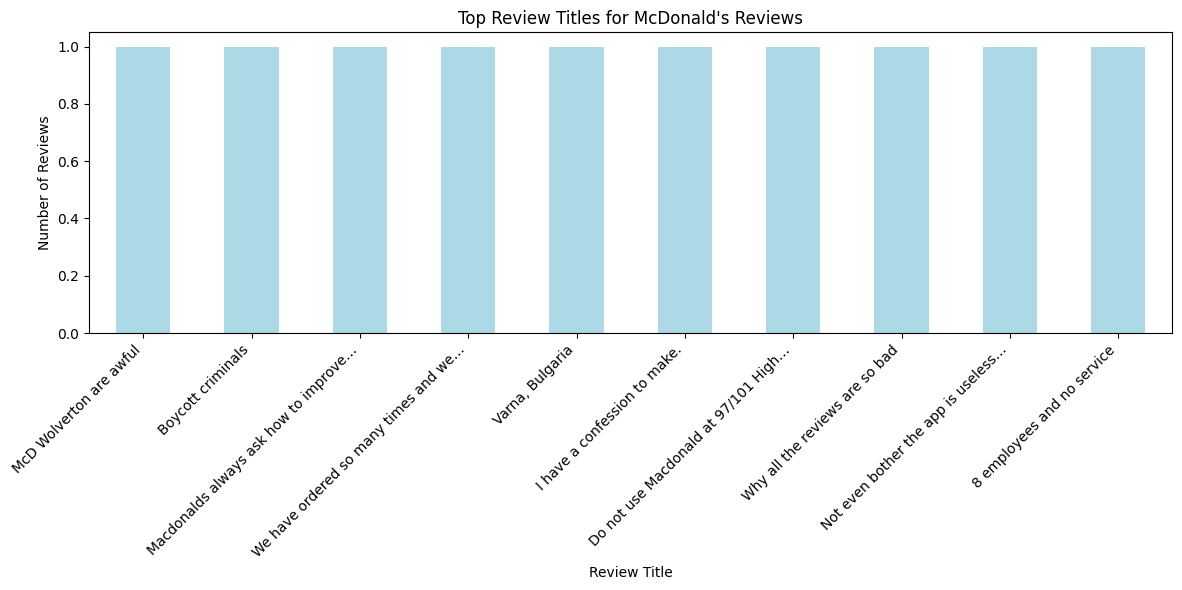

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('macdonalds.csv')

# Count the occurrences of each review title
top_review_titles = df['Review Title'].value_counts().head(10)

# Create a bar chart to visualize the most common review titles
plt.figure(figsize=(12, 6))
top_review_titles.plot(kind='bar', color='lightblue')
plt.xlabel('Review Title')
plt.ylabel('Number of Reviews')
plt.title('Top Review Titles for McDonald\'s Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Reviewer Distribution:

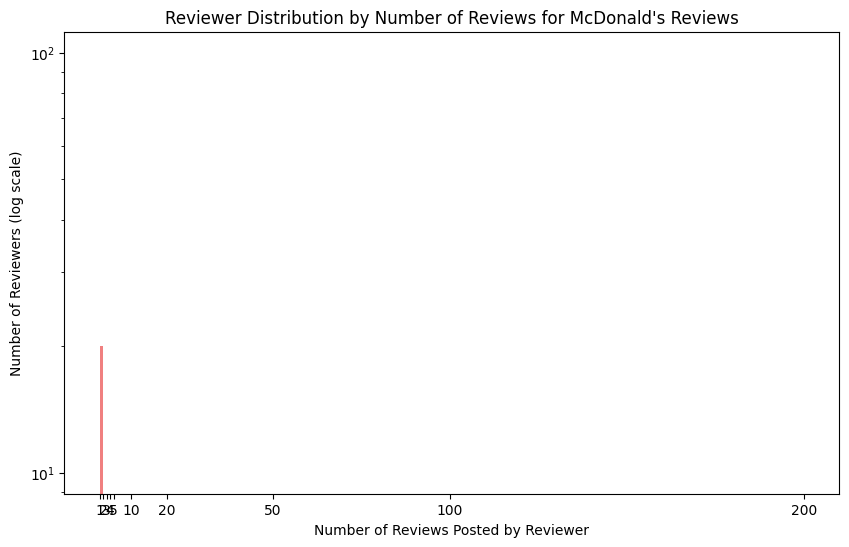

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of reviews posted by each reviewer
reviewer_distribution = df['Reviewer Name'].value_counts()

# Create a histogram with a logarithmic scale on the y-axis to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(reviewer_distribution, bins=[1, 2, 3, 4, 5, 10, 20, 50, 100, 200], color='lightcoral')
plt.xlabel('Number of Reviews Posted by Reviewer')
plt.ylabel('Number of Reviewers (log scale)')
plt.title('Reviewer Distribution by Number of Reviews for McDonald\'s Reviews')
plt.yscale('log')
plt.xticks([1, 2, 3, 4, 5, 10, 20, 50, 100, 200])
plt.show()


In [ ]:
# Topic Modelling

In [ ]:
!pip install pyLDAvis


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


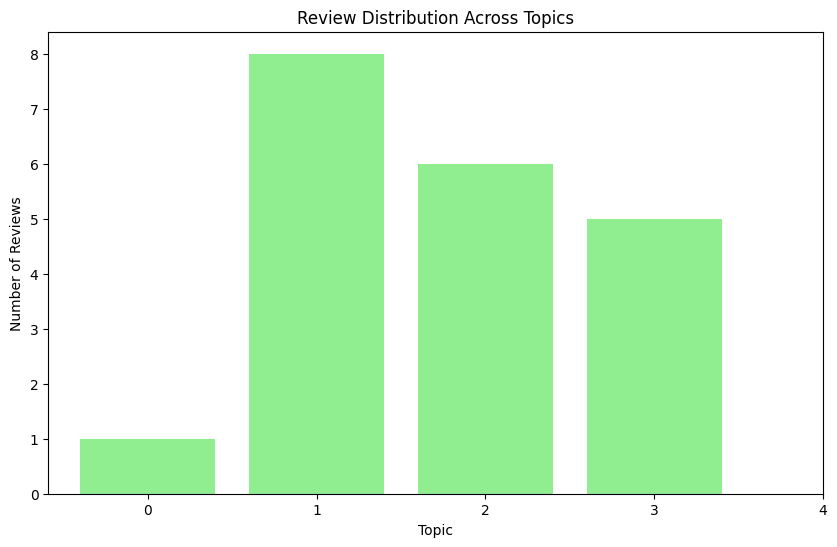

NameError: ignored

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis


# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
tfidf_data = tfidf_vectorizer.fit_transform(df['Review Comment'])

# LDA Topic Modeling
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_data)

# Visualize Topic Distribution
topic_distribution = lda.transform(tfidf_data)
df['Topic'] = topic_distribution.argmax(axis=1)

# Visualize the distribution of reviews across topics
topic_counts = df['Topic'].value_counts()
topic_counts = topic_counts.sort_index()
plt.figure(figsize=(10, 6))
plt.bar(topic_counts.index, topic_counts.values, color='lightgreen')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.title('Review Distribution Across Topics')
plt.xticks(range(num_topics))
plt.show()


# Visualize Topics with pyLDAvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, lda_corpus, id2word)
vis


In [ ]:

# Explore Common Words for Each Topic
corpus = [tfidf_vectorizer.get_feature_names_out()[i] for i in range(len(tfidf_vectorizer.get_feature_names_out()))]
lda_corpus = gensim.matutils.Sparse2Corpus(tfidf_data.T)
id2word = corpora.Dictionary.from_corpus(lda_corpus, id2word={i: word for i, word in enumerate(corpus)})
lda_model = gensim.models.LdaModel(lda_corpus, num_topics=num_topics, id2word=id2word, passes=15)
for topic in range(num_topics):
    print(f'Topic {topic + 1}: {lda_model.print_topic(topic)}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 1: 0.027*"mcdonald" + 0.026*"time" + 0.026*"order" + 0.023*"ordered" + 0.022*"food" + 0.020*"think" + 0.020*"cold" + 0.019*"east" + 0.019*"mcdonalds" + 0.019*"just"
Topic 2: 0.031*"children" + 0.030*"food" + 0.023*"macdonalds" + 0.022*"want" + 0.020*"staff" + 0.019*"bother" + 0.019*"good" + 0.018*"place" + 0.017*"missing" + 0.017*"app"
Topic 3: 0.026*"did" + 0.024*"order" + 0.024*"floor" + 0.024*"told" + 0.023*"items" + 0.021*"received" + 0.020*"fine" + 0.019*"available" + 0.019*"tables" + 0.019*"dirty"
Topic 4: 0.041*"contact" + 0.041*"food" + 0.038*"missing" + 0.029*"company" + 0.027*"absolutely" + 0.020*"half" + 0.020*"store" + 0.020*"spoke" + 0.019*"fault" + 0.019*"manager"
Topic 5: 0.034*"like" + 0.025*"fries" + 0.021*"restaurant" + 0.021*"20" + 0.020*"drive" + 0.020*"order" + 0.020*"mcdonalds" + 0.019*"experience" + 0.019*"minutes" + 0.019*"staff"
